<a href="https://colab.research.google.com/github/shwe-hg/EDA-of-Hotel-Booking-Analysis-/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel booking Analysis:

In [347]:
# importing python labraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [349]:
hotel_df =pd.read_csv("/content/Hotel Bookings.csv")

In [350]:
hotel_df.head()             # taking a look at data .

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [351]:
hotel_df.info()                   # gives the infomation of database.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [352]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [353]:
# creating the copy of dataframe so that the original database will remain unchange .
hotel_df1 = hotel_df.copy()

Before starting any of the analysis we need to understand all the rows and columns of the database .

In [354]:
hotel_df1['hotel'].unique()              # hotel has 2 entities i.e 'resort hotel' and 'city hotel' . dtype is object.

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [355]:
hotel_df1['is_canceled'].unique()         # the 1 value for cancelled , 0 is for not cancelled .

array([0, 1])

In [356]:
hotel_df1['arrival_date_year'].unique()     # all the years inside the database .

array([2015, 2016, 2017])

In [357]:
hotel_df1['arrival_date_month'].unique()     # months of arrival

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [358]:
hotel_df1['children'].unique()               # 

array([ 0.,  1.,  2., 10.,  3., nan])

In [359]:
hotel_df1['market_segment'].unique()          # gives the type of segment the customer belongs to .

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [360]:
hotel_df1['meal'].unique()                     # gives the meal perfered by customers .

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [361]:
hotel_df1['distribution_channel'].unique()     # gives how the customer access the stay 

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [362]:
hotel_df1['adults'].unique()                 

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

# **Data Pre Processing :**

In [328]:
# copy of a database 
hotel_df1 = hotel_df.copy()

**Deleting duplicate rows :**

In [329]:
# getting the  number of rows which have duplicated rows .
hotel_df1[hotel_df1.duplicated()].shape

(31994, 32)

In [330]:
# deleting the duplicate rows by using drop , and giving inplace=True to change the original data .
hotel_df1.drop_duplicates(inplace=True)

In [331]:
hotel_df1.shape

(87396, 32)

**Dealing with missing values :**

In [332]:
# isnull gives all the null values present in the database.
hotel_df1.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [333]:
# this will give the list of total null values for each column .
hotel_df1.isnull().sum().sort_values()

hotel                                 0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
is_repeated_guest                     0
reservation_status                    0
distribution_channel                  0
reservation_status_date               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
market_segment                        0
is_canceled                           0
arrival_date_week_number              0


In [334]:
# printing them in descending order upto 8 values .
hotel_df1.isnull().sum().sort_values(ascending = False)[:8]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
booking_changes           0
deposit_type              0
dtype: int64

fillna() is used for handling missing data in a DataFrame or Series. It can be used to fill missing values with a specific value.

In [335]:
# if no id of agent or company is null replace it with the value 0 becoz there may be some cases when customer didnt booked hotel via any agent or via any company.
hotel_df1[['agent','company']]=hotel_df1[['agent','company']].fillna(0)

In [336]:
hotel_df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [337]:
# give the children column with mean value by replacing the null value .
hotel_df1['children'].fillna(hotel_df1['children'].mean(), inplace = True)

In [338]:
# the country column is of string datatype we need to replace the missing value with the mode of country column .
hotel_df1['country'].fillna('others',inplace=True)

In [339]:
# checking if all the null values are dropped .
hotel_df1.isnull().sum().sort_values(ascending = False)[:8]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
dtype: int64

**Converting Datatype from float to integer :**

In [340]:
# getting the values with float values .
float_cols = hotel_df.select_dtypes(include=['float'])

In [341]:
print(float_cols.columns)
print(float_cols.head())


Index(['children', 'agent', 'company', 'adr'], dtype='object')
   children  agent  company   adr
0       0.0    NaN      NaN   0.0
1       0.0    NaN      NaN   0.0
2       0.0    NaN      NaN  75.0
3       0.0  304.0      NaN  75.0
4       0.0  240.0      NaN  98.0


In [342]:
hotel_df1[['children', 'company', 'agent']] =hotel_df1[['children', 'company', 'agent']].astype('int64')

In [343]:
hotel_df1[['adr']] =hotel_df1[['adr']].astype('int64')
hotel_df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,0,0,Transient,96,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,0,0,Transient,225,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,0,0,Transient,157,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,0,0,Transient,104,0,0,Check-Out,2017-09-07


**Adding some of the additional columns**

by the help of these column we can analyse the customer stay period .

In [344]:
# creating the subset dateframe of city hotel and resort hotel 
City_df =pd.DataFrame(hotel_df1[hotel_df1['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(hotel_df1[hotel_df1['hotel'] =='Resort Hotel'])

In [345]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel_df1['stayed_people'] =hotel_df1['adults']+hotel_df1['children']+hotel_df1['babies']

In [346]:
hotel_df1['kids'] = hotel_df1.children + hotel_df1.babies           
hotel_df1['Full_stay'] = hotel_df1.stays_in_weekend_nights + hotel_df1.stays_in_week_nights

# Exploratory Data Analysis 

There are two types of hotels present in the database i.e 'City' and 'Resort' .

In [295]:
hotel_type=hotel_df1['hotel'].value_counts()
hotel_type

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

**lets try some questions **

**1.What is the booking ratio between 'City hotel' and 'Resort hotel '**

Text(0.5, 1.0, 'Hotel type')

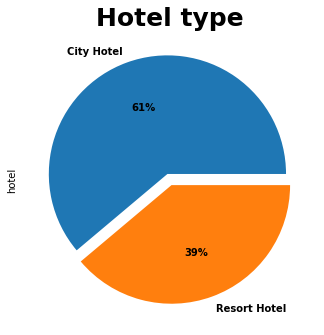

In [296]:
plt.subplot(2,2,1)
hotel_type.plot.pie(x='City Hotel', y ='Resort Hotel',autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(12,12),explode =[0.05]*2) 
plt.title('Hotel type',fontweight="bold", size=25)

Con:City hotel has more booking as compared to Resort hotel .

**2.what is the ratio of food preferred by customer .**

Text(0.5, 1.0, 'Favourite food type')

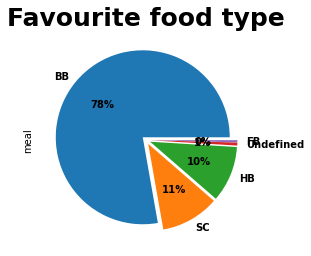

In [297]:
plt.subplot(1,1,1)
meal_type=hotel_df1['meal'].value_counts()
meal_type.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*5)
plt.title('Favourite food type',fontweight="bold", size=25)

Con : Most preferred food type is BB .

**3.Booking cancelled graph between 'City hotel' and 'Resort hotel '**

In [298]:
cancelled_bookings =hotel_df1['is_canceled'].sum()

# Print the number of cancelled bookings
print("Number of cancelled bookings: ",cancelled_bookings)


Number of cancelled bookings:  24025


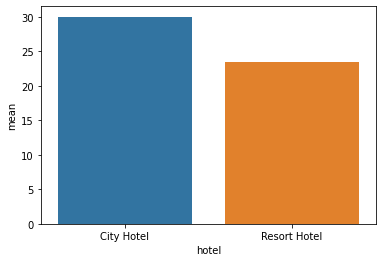

In [299]:
z=hotel_df1.groupby('hotel')["is_canceled"].describe()
sns.barplot(x=z.index , y=z["mean"]*100)

Con: City hotel has more booking cancelation than Resort hotel .

**4.How guests preferred to come as single/couple/family ?**

In [300]:
City_df =pd.DataFrame(hotel_df1[hotel_df1['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(hotel_df1[hotel_df1['hotel'] =='Resort Hotel'])

In [301]:
City_df['kids'].value_counts()

0     48194
1      3128
2      2023
3        81
10        1
9         1
Name: kids, dtype: int64

In [302]:
Resort_df['kids'].value_counts()

0     30099
1      2149
2      1690
3        29
10        1
Name: kids, dtype: int64

In [303]:
hotel_df1['adults'].value_counts()


2     64497
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


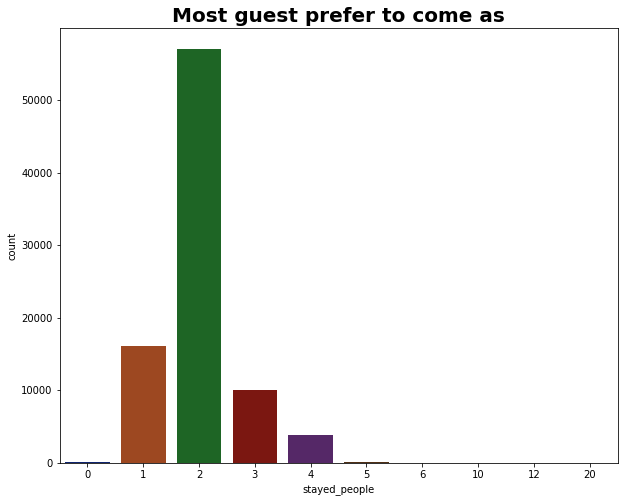

In [304]:
hotel_df1.loc[hotel_df1.stayed_people > 20, 'stayed_people'] = 20   
plt.figure(figsize=(10,8))
sns.countplot(hotel_df1['stayed_people'], palette='dark')
plt.title('Most guest prefer to come as',fontweight="bold", size=20) 
plt.show()                                                                      

Con : Guests prefer to visit as pair .

**5.% of how the customer accessed the stay ?**

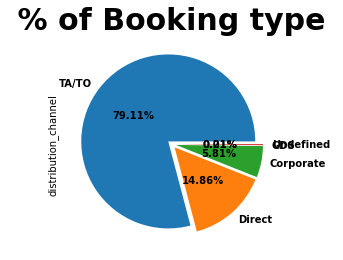

In [305]:
plt.subplot(1,1,1)
booking_distibution_type=hotel_df1['distribution_channel'].value_counts()
booking_distibution_type.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'}, pctdistance=0.5,explode = [0.05]*5)
plt.title(' % of Booking type ', fontweight ='bold', size=30 );

Con : People prefer to do the bookings by TA/TO i.e 79.11% . 

**6.What is the preferred way of stay in 'city hotel' and 'resort hotel' ?**

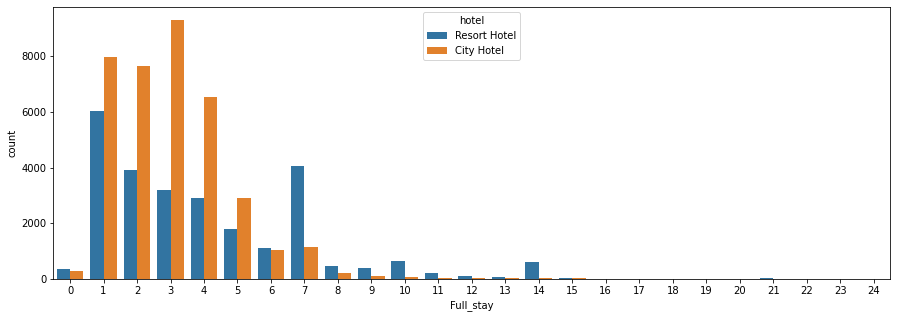

In [306]:
not_canceled=hotel_df1[hotel_df1['is_canceled']==0]
a=not_canceled[not_canceled['Full_stay'] < 25 ]
plt.figure(figsize=(15,5))
sns.countplot(x=a['Full_stay'],hue=a['hotel'])  # "hue" refers to a feature used in visualization. 
plt.show()

Con : People like to stay for less than 4 days and the city hotel has more stays than resort hotel .

**7.Which of agent made most number of bookings ?**

<Figure size 720x360 with 0 Axes>

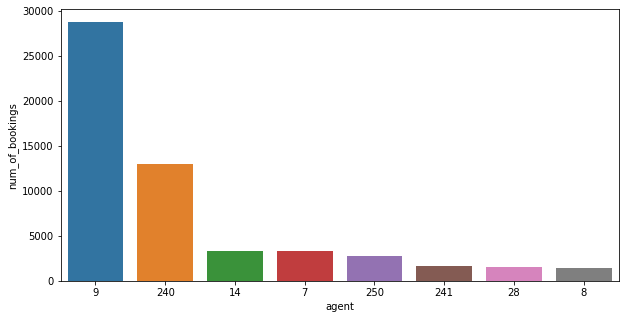

In [307]:
# 0 represents that booking is not made by any of the agent
# Selecting top 8 performing agents
plt.figure(figsize = (10,5))
data1 = pd.DataFrame(hotel_df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
data1.drop(data1[data1['agent'] == 0].index, inplace = True)           
data1 = data1[:8]                                                      
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = data1, order = data1.sort_values('num_of_bookings', ascending = False).agent)

Con : Agent 9 has made more no of bookings than other Agents .

**8.Graph for the countries from which the most of the customer visited the hotel ?**

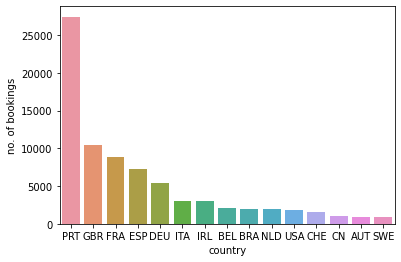

In [308]:
group_by_country = hotel_df1.groupby('country')
data2 = pd.DataFrame(group_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
data2 = data2[:15]
sns.barplot(x = data2.index, y = data2['no. of bookings'])
plt.show()

Con : The most visited country is Portugal.

**9.pie graph for the parking space.**

Text(0.5, 1.0, 'required_parking_spaces')

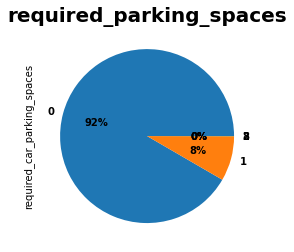

In [309]:
plt.subplot(1,1,1)
Car_parking_spaces = hotel_df1.required_car_parking_spaces.value_counts()
Car_parking_spaces.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('required_parking_spaces',fontweight="bold", size=20)

Con : Only 8% of guests want parking space .

**10.Hotel wise booking of customer on the based of date , month and year .**

creating a subset dataframe for 'city hotel ' and 'resort hotel ' .

In [310]:
City_df =pd.DataFrame(hotel_df1[hotel_df1['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(hotel_df1[hotel_df1['hotel'] =='Resort Hotel'])

In [311]:
City_df.arrival_date_month.value_counts(ascending=True)

January      2730
November     2942
December     3014
February     3605
October      4208
September    4240
March        4856
June         5005
April        5080
May          5413
July         5744
August       6591
Name: arrival_date_month, dtype: int64

In [312]:
City_df.arrival_date_month.value_counts().sum()

53428

In [313]:
Resort_df.arrival_date_month.value_counts(ascending=True)

January      1963
November     2053
December     2117
September    2450
February     2493
March        2657
October      2726
June         2760
April        2828
May          2942
July         4313
August       4666
Name: arrival_date_month, dtype: int64

In [314]:
Resort_df.arrival_date_month.value_counts().sum()

33968

Con : City hotel has more arrivals than Resort hotel and August have maximum bookings over a year .

**11.Graph to show the variation of bookings from year to year .**

Text(0.5, 1.0, ' bookings by year')

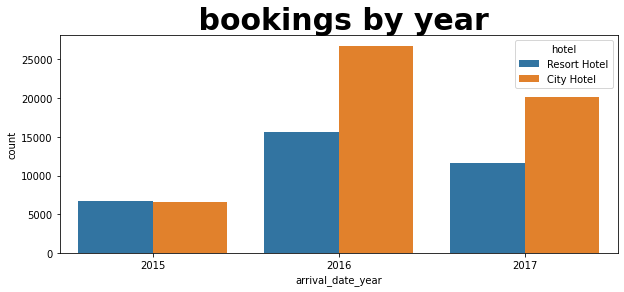

In [315]:
months=['January','February','March','April','May','June','July','August','September','October','November','December']
hotel_df1['arrival_date_month']=pd.Categorical(hotel_df1['arrival_date_month'],categories=months ,ordered=True )
plt.figure(figsize=(10,4))
sns.countplot(x='arrival_date_year',data=hotel_df1 , hue='hotel').set_title (' bookings by year',fontweight="bold", size=30)

Con: 2016 have more arrivals than any other year and city hotel has more arrival than resort hotel in every year .

**12.Graph represention of monthly bookings .**

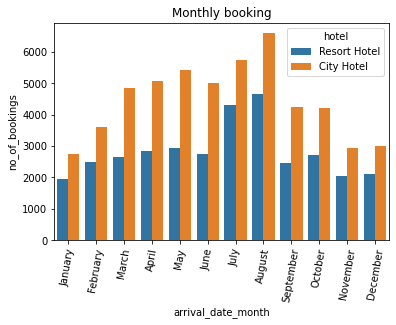

In [316]:
hotel_df1['no_of_bookings']=1
month_sorted=['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly booking")
sns.barplot(x="arrival_date_month", y ="no_of_bookings" ,hue=hotel_df1['hotel'], estimator= sum, data= hotel_df1)
plt.xticks(rotation=80)
plt.show()

Con : August has maximum bookings over a year .

**13.Which hotel has higher booking cancelation rate .**

In [317]:
cancelled_data=hotel_df1[hotel_df1['is_canceled']==1]
cancel_group = cancelled_data.groupby('hotel')
Data1=pd.DataFrame(cancel_group.size()).rename(columns={0:'total_canceled_bookings'})

grouped_by_hotel = hotel_df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
Data2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
Data3 = pd.concat([Data1,Data2], axis = 1)

# Calculating cancel percentage 
Data3['cancel_%'] = round((Data3['total_canceled_bookings']/Data3['total_bookings'])*100,2)
Data3

,total_canceled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16049,53428,30.04
Resort Hotel,7976,33968,23.48


Con : Total canceled booking % is more in city hotel as compared to resort hotel .

Text(0.5, 1.0, 'total_canceled_bookings')

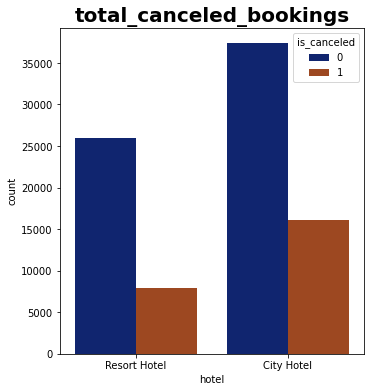

In [318]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=hotel_df1,palette='dark')
plt.title("total_canceled_bookings",fontweight="bold", size=20)

**14.Which time period of month have more and less number of customer arrival ?**

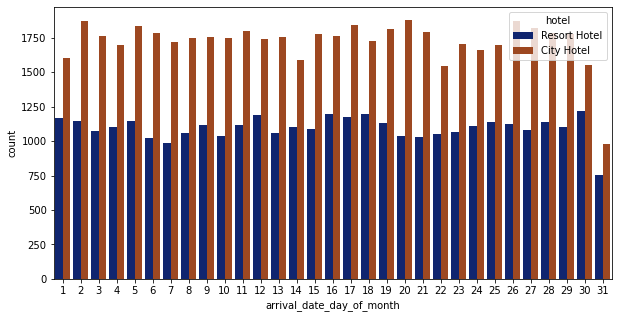

In [319]:
plt.figure(figsize=(10,5))
sns.countplot(data=hotel_df1,x="arrival_date_day_of_month",hue='hotel',palette='dark')
plt.show()

Con : There are less bookings at the end of month .

**15.How many customers were visited more than once ?**

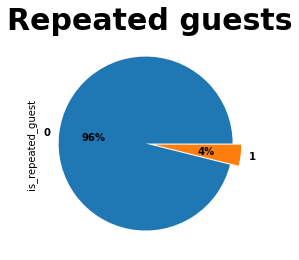

In [320]:
plt.subplot(1,1.5,1)
Repeated = hotel_df1.is_repeated_guest .value_counts()
Repeated.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*2)
plt.title('Repeated guests', fontweight ='bold', size =30);

Con : Only 4% of guests were visited more than once .

**16.How many type of customer were visited the hotel ?**

Text(0.5, 1.0, 'Customer type')

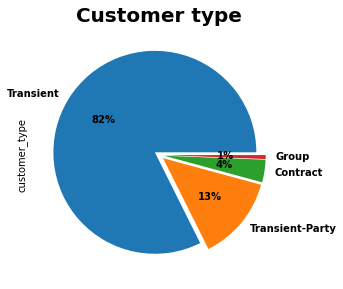

In [321]:
hotel_df1.customer_type.unique()
Customer_typ =hotel_df1.customer_type .value_counts()
plt.figure(figsize =(10,8))

plt.subplot(1,2,1 )
Customer_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode =[0.05]*4) 
plt.title('Customer type',fontweight="bold", size=20)

Con : There are 4 types of Customer. Out of them most are Transient Type i.e 82% .

**17.which type of room is most preferred by customer ?**

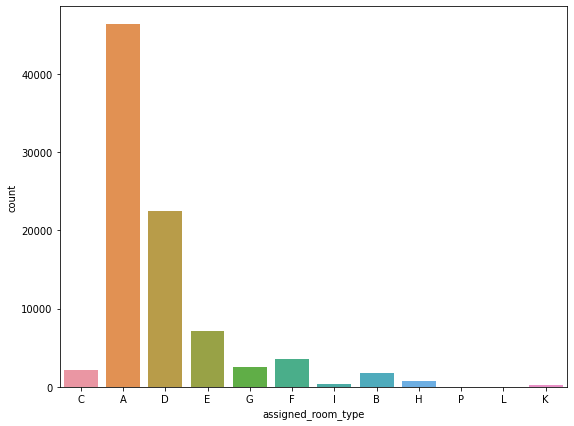

In [322]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.countplot( x = hotel_df1['assigned_room_type'])



Con : Most preferred rooms are A & D  .

**18.what is number of stays on weekend night ?**

Text(0.5, 1.0, 'Number of stays on weekend nights')

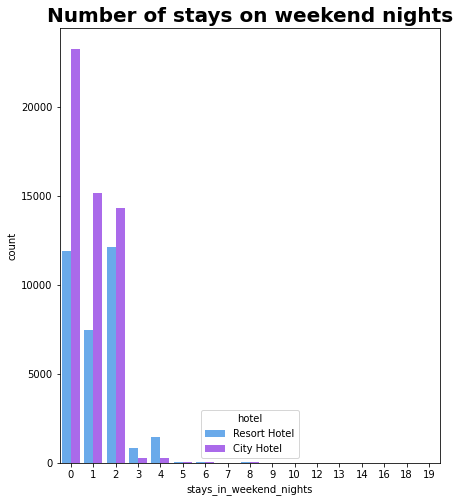

In [323]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=hotel_df1, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)


Con : City hotel has more booking than Resort hotel on weekend nights .

**19.what is number of stays on weekday night ?**




Text(0.5, 1.0, 'Number of stays on weekday nights')

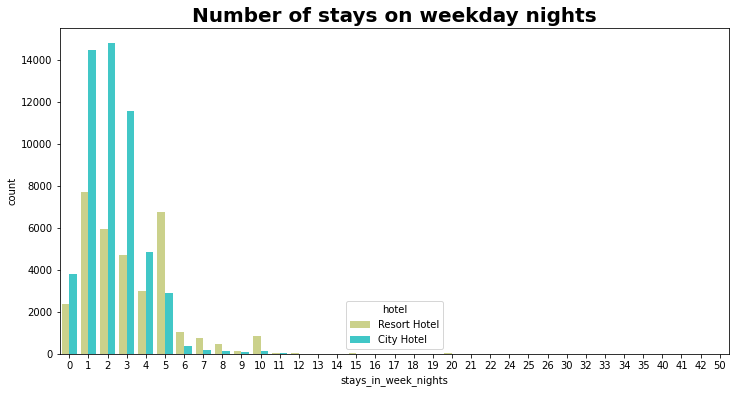

In [324]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=hotel_df1, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)

Con :  City hotel has more booking than Resort hotel on weekday nights .

**20.what is the preferred booking type ?**

Text(0.5, 1.0, 'Booking preferred by customer with deposite type')

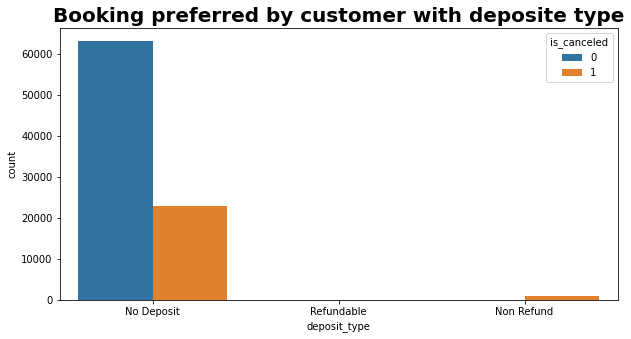

In [325]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=hotel_df1,hue ='is_canceled')
plt.title('Booking preferred by customer with deposite type',fontweight ="bold",size = 20)

Con : Most Bookings are done with 'No deposite' and most cancellations are also in 'no deposit' bookings. It is so surprising to see cancellations with 'Non-refundable' bookings also .

**21.how many special guests are there and how many special request they have made ?**

In [326]:
hotel_df1['total_of_special_requests'].value_counts(ascending=False)

0    43894
1    29017
2    11812
3     2317
4      320
5       36
Name: total_of_special_requests, dtype: int64

Text(0.5, 0, 'No. of special requests made by guests')

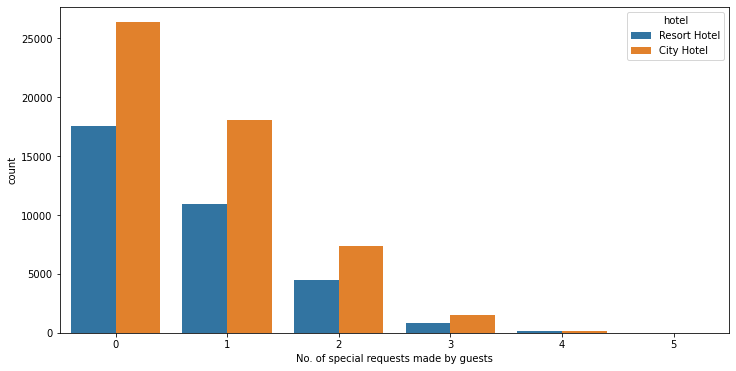

In [327]:
plt.figure(figsize =(12,6))
sns.countplot(data =hotel_df1,x ='total_of_special_requests', hue ='hotel')
plt.xlabel('No. of special requests made by guests')

Con : City hotels have more no. of special requests. Most of them ask for only 1 special request ,and very few guests made 2 requests .

# **Conclusion :**

. The majority of guests come from western europe countries.We should spend a significant amount of our budget on those area.



. Around 61% bookings are for City hotel and 39% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel.


.Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.




.We should also target months between May to Aug. Those are peak months due to the summer period.

.Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

.79.11 % distribution_channel is TA/TO

. Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

. November,Descember, February And January are the months which has less booking so in this perios you can get rooms with less average daily rate. And Avoid most busiest months for hotels (May,June,July,August).

. Only few people need parking space , so no need to focus too much on it .

. We need find what customers are liking and what they dislike , which can give an idea in the future .

. we need to which month of year is getting less bookings , so that we can make some creativity activities or provide special discounts so be get more no of guests .